# Exploratory Data Analysis

### Let's import usual libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
%load_ext google.cloud.bigquery

## Let's load credentials

In [6]:
%env GOOGLE_APPLICATION_CREDENTIALS = ../dsi-capstone-f19-group-1-198add732865.json

env: GOOGLE_APPLICATION_CREDENTIALS=../dsi-capstone-f19-group-1-198add732865.json


## Let's explore the table and see what's interesting

In [9]:
%%bigquery df_s
SELECT * from tweets.all_valid_tweets limit 10;

In [15]:
df_s

,contributors,coordinates,created_at,display_text_range,favorite_count,favorited,full_text,latitude,longitude,id,...,victor_white,jordan_baker,yvette_smith,dante_parker,mckenzie_cochran,tyree_woodson,other_murders_august,other_murders_before,full_text_cleaned,is_retweet
0,,,2014-08-18 23:28:47+00:00,"[0, 136]",0,False,Peace to the brother who saw his friend killed...,None,None,501511051817402400,...,0,0,0,0,0,0,0,0,peace to the brother who saw his friend killed...,False
1,,,2014-08-15 01:42:42+00:00,"[0, 76]",0,False,RT @ryanjreilly: #Ferguson last night versus t...,None,None,500095205320560640,...,0,0,0,0,0,0,0,0,ferguson last night versus tonight $URL$,True
2,,,2014-08-10 04:07:21+00:00,"[0, 138]",0,False,"See what they do to concerned citizens, while ...",None,None,498319665794646000,...,0,0,0,0,0,0,0,0,see what they do to concerned citizens while i...,False
3,,,2014-08-15 15:38:15+00:00,"[0, 115]",1,False,@Mr_GQ_ It's like 2 months earlier. Where's th...,None,None,500305475993227260,...,0,0,0,0,0,0,0,0,its like 2 months earlier wheres the hat? did ...,False
4,,,2014-08-25 16:55:18+00:00,"[0, 140]",0,False,RT @CitizenRadio: Remember Tony Blair? He’s st...,None,None,503948746309517300,...,0,0,0,0,0,0,0,0,remember tony blair? he’s still awful huffpost...,True
5,,,2014-08-15 19:29:11+00:00,"[0, 70]",0,False,"RT @DatJuanDude: No Justice No Peace, Don't Tr...",None,None,500363591976247300,...,0,0,0,0,0,0,0,0,no justice no peace dont trust the police ferg...,True
6,,,2014-08-13 16:57:45+00:00,"[0, 39]",4,False,“@DOELO_239: JUSTICE FOR #MIKEBROWN” #🙌,None,None,499600706975055900,...,0,0,0,0,0,0,0,0,“ justice for mikebrown” 🙌,True
7,,,2014-08-14 15:43:13+00:00,"[0, 102]",0,False,RT @ndilettante: PLEASE RT THERE IS TOO MUCH M...,None,None,499944337435013100,...,0,0,0,0,0,0,0,0,please rt there is too much misinformation goi...,True
8,,,2014-08-18 19:35:00+00:00,"[0, 140]",0,False,RT @KathyAngel2: @Politics_PR @stphil The fact...,None,None,501452221230641150,...,0,0,0,0,0,0,0,0,the fact michaelbrown may have had marijuana i...,True
9,,,2014-08-18 02:49:27+00:00,"[0, 87]",0,False,RT @PDPJ: #Ferguson 5 ambulances being brought...,None,None,501199165490081800,...,0,0,0,0,0,0,0,0,ferguson 5 ambulances being brought into stagi...,True


In [18]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 97 columns):
contributors                               10 non-null object
coordinates                                10 non-null object
created_at                                 10 non-null datetime64[ns, UTC]
display_text_range                         10 non-null object
favorite_count                             10 non-null int64
favorited                                  10 non-null bool
full_text                                  10 non-null object
latitude                                   0 non-null object
longitude                                  0 non-null object
id                                         10 non-null int64
id_str                                     10 non-null object
in_reply_to_screen_name                    10 non-null object
in_reply_to_status_id                      2 non-null float64
in_reply_to_status_id_str                  2 non-null object
in_reply_to_user_id     

With the info function and the sample, I think it'd be interesting to dive deeper into some questions. 

- How frequent are tweets?
- How frequent are retweets?
- User Location and place to understand if some regions drive more conversation
- Sensitive as a proxy for sentiment
- Hashtags as a proxy for topic modeling

### Frequency of Tweets

In [ ]:
%%bigquery df_ft
select EXTRACT(DATE from created_at) as date, count(*) as count_tweets, 
        count(distinct id) as unique_id,
        count(distinct user_id) as unique_user_id,
        sum(cast(user_verified as INT64)) as num_verified
        from tweets.all_tweets group by 1;

### Frequency of Reweets

In [ ]:
%%bigquery df_fr
SELECT count(*) as day_tweets,
    (max(created_at)-min(created_at)) as rg,
    from tweets.all_valid_tweets
    where is_retweet = True
    group by day_tweets;


In [ ]:
df_fr

### User location and Place

The dataset shows 2 fields related to location: place and user location. Let's examine what is contained on each field.

In [232]:
%%bigquery df_ul
SELECT user_location, count(*) as total
    from tweets.all_valid_tweets
    where is_retweet = False
    group by user_location;

In [248]:
df_ul2 = df_ul[:9].copy()

new_row = pd.DataFrame(data = {
    'total' : [df_ul['total'][9:].sum()],
    'user_location' : 'other'
})

new_row.rename(index={0: 10}, inplace=True)

df_ul2 = pd.concat([df_ul2, new_row])

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


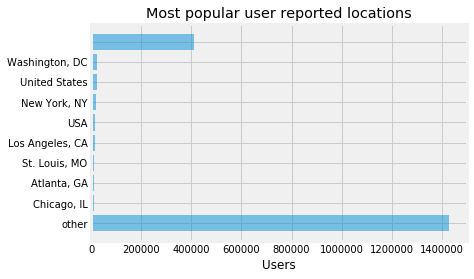

In [250]:
locations = list(df_ul2.user_location)
y_pos = np.arange(len(df_ul2))
count = list(df_ul2.total)

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, locations)
plt.xlabel('Users')
plt.title('Most popular user reported locations')
plt.gca().invert_yaxis()

plt.show()

In [236]:
df_ul = df_ul.sort_values(by='total', ascending=False).reset_index(drop=True)
df_ul[:50]

,user_location,total
0,,409835
1,"Washington, DC",24264
2,United States,22849
3,"New York, NY",18693
4,USA,16737
5,"Los Angeles, CA",16362
6,"St. Louis, MO",13080
7,"Atlanta, GA",12550
8,"Chicago, IL",11896
9,"Brooklyn, NY",9416


User location seems to be self reported, and the most common value is empty, and some other categories are.... creative... Let's look at the place field, which might be more promising.

In [251]:
%%bigquery df_pl
SELECT place, count(*) as total, is_retweet
    from tweets.all_valid_tweets
    group by place, is_retweet;

In [252]:
a = df_pl['place'][0]
a

"{'attributes': {}, 'bounding_box': {'coordinates': [[[-74.026675, 40.683935], [-73.910408, 40.683935], [-73.910408, 40.877483], [-74.026675, 40.877483]]], 'type': 'Polygon'}, 'contained_within': [], 'country': 'United States', 'country_code': 'US', 'full_name': 'Manhattan, NY', 'id': '01a9a39529b27f36', 'name': 'Manhattan', 'place_type': 'city', 'url': 'https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json'}"

This field contains a dictionary. Let's pull data related to the country code, the state and the city. This might show where's support and information flowing through.

In [268]:
df_pl['country'] = 'NA'
df_pl['state'] = 'NA'
df_pl['city'] = 'NA'

In [ ]:
for i in range(0,len(df_pl)):
    a = df_pl.iloc[i]['place']
    try:
        df_pl.iloc[i]['country'] = a.split('\'country_code\'')[1].split('\'')[1].strip()
    except:
        pass
    try:
        df_pl.iloc[i]['state'] = a.split('\'full_name\'')[1].split('\'')[1].split(', ')[1].strip()
    except:
        pass
    try:
        df_pl.iloc[i]['city'] = a.split('\'name\'')[1].split('\'')[1].strip()
    except:
        pass

Let's quickly see how the spots change with respect to the user_location field

In [ ]:
df_pl = df_pl.sort_values(by='total', ascending=False)
df_pl

In [ ]:
#Let's see the top 5 retweeting countries

df_pl = df_agg[0].sort_values(by='count', ascending=False)

topics = list(df_pl)
y_pos = np.arange(len(df2_themes))
count = list(df2_themes['count'])

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, topics)
plt.xlabel('Tweets')
plt.title('Most popular hashtags on Twitter')
plt.gca().invert_yaxis()

plt.show()

In [ ]:
#Top tweeting states
import plotly.graph_objects as go

df = df_pl[df_pl['is_retweet'==False]]

df = df[df['country' == 'US']]

df = df.groupby(['state']).agg(['sum'])['total']

fig = go.Figure(data=go.Choropleth(
    locations=df['state'], # Spatial coordinates
    z = df['total'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [ ]:
#Top retweeting states

df = 

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [ ]:
df_loc.groupby(['place']).agg(['count'])#['id']

In [ ]:
df_loc.groupby(['user_location']).agg(['count'])#['id']

### Sensitive content

From our data set we could start inferring emotion by understanding content labeled as sensitive. 

In [ ]:
%%bigquery df_sc
SELECT possibly_sensitive, count(*) as total, is_retweet, day_of_tweet
    from tweets.all_valid_tweets
    group by possibly_sensitive, is_retweet, day_of_tweet;

In [ ]:
df_sc

In [ ]:
ax = df_sc.plot(x='date',
             y='count_tweets',
             kind='line',
             figsize=(15,6))
df_date.plot(x='date',
            y='unique_user_id',
            kind='line',
            ax=ax)
df_date.plot(x='date',
            y='num_verified',
            kind='line',
            ax=ax)

In [ ]:
df_sc.groupby(['possibly_sensitive']).agg(['count'])['id']

In [92]:
%%bigquery df_sen
SELECT *
    from tweets.all_valid_tweets
    where possibly_sensitive;

In [96]:
df_sen['full_text'][8]

'RT @MatthewKeysLive: Stunning New York Times photo from #Ferguson, Missouri - http://t.co/FwE871Zy1V http://t.co/TKrntsXmWw'

In [ ]:
df_sc.groupby(['possibly_sensitive']).agg(['count'])['id']

### Hashtags

Since our project is going to gravitate around topic modeling, a good idea would be to understand the hashtags on the sample of tweets, as this will give us an idea of the topics that users believe will make their messages matter.

We started this by pulling hashtags of tweets that weren't retweets.

In [164]:
%%bigquery df_has
SELECT id, hashtags
    from tweets.all_valid_tweets
    where is_retweet = False;

In [165]:
#Now, let's make a list of individual hashtags, as a tweet might contain none
# or more than one.
themes = []
for i in range(0,len(df_has)):
    for k in range(0,len(df_has['hashtags'].iloc[i].replace('[','').replace(']','').replace('"','').split(','))):
        l = df_has['hashtags'].iloc[i].replace('[','').replace(']','').replace('"','').split(',')[k].strip().lower()
        themes.append(l)

In [170]:
themes = pd.DataFrame(themes)
themes['hashtags'] = themes
df_agg = themes.groupby(['hashtags']).agg(['count'])
df_themes = df_agg[0].sort_values(by='count', ascending=False)

In [228]:
len(themes)

3013621

There are several hashtags. Let us see in a bar plot what are the 15 most mentioned. 

In [214]:
df2_themes = df_themes[:14].copy()

new_row = pd.DataFrame(data = {
    'count' : [df_themes['count'][14:].sum()]
})

new_row.rename(index={0: 'other'}, inplace=True)

df2_themes = pd.concat([df2_themes, new_row])

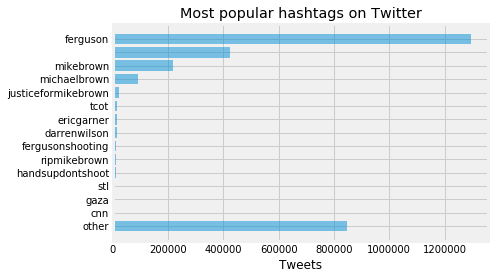

In [227]:
topics = list(df2_themes.index)
y_pos = np.arange(len(df2_themes))
count = list(df2_themes['count'])

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, topics)
plt.xlabel('Tweets')
plt.title('Most popular hashtags on Twitter')
plt.gca().invert_yaxis()

plt.show()

The most common hashtags were related to geography (Ferguson and St Louis), as well as to Michael Brown, the individual shot on August 9th. There are also several hashtags related to protests, justice and media. A large number of Tweets didn't mention any hashtags.

In [229]:
#Let's examine the 50 most relevant topics.
df_themes[:50]

,count
hashtags,
ferguson,1293741
,422648
mikebrown,219444
michaelbrown,92359
justiceformikebrown,22570
tcot,15955
ericgarner,15270
darrenwilson,15096
fergusonshooting,13602


It shows more detail, giving an insight into topics like racism, riots, and mentions of social organizations and movements like nmos14 and blacklivesmatter.